# Final Project

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Random vars parameters

# P_o: mean 13MPa and sd: 1MPa
P_o_mean = 13
P_o_sd = 1
# sigma_y: 235MPa and sd: 10
sigma_y_mean = 235
sigma_y_sd = 10
# sigma_u: 375MPa and sd: 12
sigma_u_mean = 375
sigma_u_sd = 12
# D_o: 1000mm and 0.5mm
D_o_mean = 1000
D_o_sd = 0.5
# D_i: 960mm and 0.5mm 
D_i_mean = 960
D_i_sd = 0.5

# Generate random vars
def P_o():
    return np.random.normal(loc = P_o_mean, scale = P_o_sd)
def sigma_y(sd = sigma_y_sd):
    return np.random.normal(loc = sigma_y_mean, scale = sd)
def sigma_u():
    return np.random.normal(loc = sigma_u_mean, scale = sigma_u_sd)
def D_o():
    return np.random.normal(loc = D_o_mean, scale = D_o_sd)
def D_i():
    return np.random.normal(loc = D_i_mean, scale = D_i_sd)
def r(sigma_u, sigma_y):
    return 0.224 * ((sigma_u / sigma_y) - 1) ** 0.604

# Pressure random vars
def faupel_37(sigma_y_obtained, sigma_u_obtained, D_o_obtained, D_i_obtained):
    P_b = 2 / (3 ** 0.5)
    P_b *= sigma_y_obtained
    P_b *= (2 - (sigma_y_obtained / sigma_u_obtained))
    P_b *= np.log(D_o_obtained/D_i_obtained)
    return P_b

def svensson_38(sigma_u, sigma_y, n, D_o, D_i):
    P_b = sigma_u * (0.25 / (n + 0.227))
    P_b *= (np.e/n) ** r(sigma_u, sigma_y)
    P_b *= np.log(D_o / D_i)
    return P_b

def christopher_39(sigma_u, sigma_y, D_o, D_i):
    P_b = (2/((3 ** 0.5) ** (r(sigma_u,sigma_y) + 1))) * sigma_u
    P_b *= ((D_o - D_i)/D_i)
    return P_b

def mod_faupel_40(sigma_u,sigma_y,D_o,D_i):
    P_b = 13.21 * sigma_y
    P_b *= ((sigma_y / sigma_u) ** 4)
    P_b *= np.log(D_o / D_i)
    return P_b

def mod_faupel_41(sigma_u, sigma_y, D_o, D_i):
    P_b = (2/(3 ** 0.5)) * sigma_y
    P_b *= (1 + (0.65 * (1 - (sigma_y / sigma_u))))
    P_b *= np.log(D_o / D_i)
    return P_b


In [ ]:
# Simulate 1000

# Seed for consistency
np.random.seed(1)

power_of_10 = 5

n_s = [(10 ** i, (10 ** i) * 2.5, (10 ** i) * 5, (10 ** i) * 7.5) for i in range(power_of_10)]
res = [item for t in n_s for item in t][4:]
n_s = list(map(lambda x: int(x), res))

# Save all final probabilities
probs_faupel_37 = np.array([])
probs_svensson_38 = np.array([])
probs_christopher_39 = np.array([])
probs_mod_faupel_40 = np.array([])
probs_mod_faupel_41 = np.array([])

for n in n_s:
    # Generate faupel_37 and P_o
    faupel_37_simulated = np.array([])
    svensson_38_simulated = np.array([])
    christopher_39_simulated = np.array([])
    mod_faupel_40_simulated = np.array([])
    mod_faupel_41_simulated = np.array([])

    for i in range(n):

        simulated_sigma_y = sigma_y()
        simulated_sigma_u = sigma_u()
        simulated_D_o = D_o()
        simulated_D_i = D_i()

        faupel_37_simulated = np.append(faupel_37_simulated, faupel_37(simulated_sigma_y, simulated_sigma_u, simulated_D_o, simulated_D_i))

        svensson_38_simulated = np.append(svensson_38_simulated, svensson_38(simulated_sigma_u, simulated_sigma_y, 0.15, simulated_D_o, simulated_D_i))

        christopher_39_simulated = np.append(christopher_39_simulated, christopher_39(simulated_sigma_u, simulated_sigma_y, simulated_D_o, simulated_D_i))

        mod_faupel_40_simulated = np.append(mod_faupel_40_simulated, mod_faupel_40(simulated_sigma_u, simulated_sigma_y, simulated_D_o, simulated_D_i))

        mod_faupel_41_simulated = np.append(mod_faupel_41_simulated, mod_faupel_41(simulated_sigma_u, simulated_sigma_y, simulated_D_o, simulated_D_i))
        
    P_o_simulated = np.squeeze(np.random.normal(13, 1, size = (n, 1)))
    # Compare them

    smaller_than_P_o_faupel_37 = faupel_37_simulated < P_o_simulated
    smaller_than_P_o_svensson_38 = svensson_38_simulated < P_o_simulated
    smaller_than_P_o_christopher_39 = christopher_39_simulated < P_o_simulated
    smaller_than_P_o_mod_faupel_40 = mod_faupel_40_simulated < P_o_simulated
    smaller_than_P_o_mod_faupel_41 = mod_faupel_41_simulated < P_o_simulated
    
    # Calculate probabilities
    probs_faupel_37 = np.append(probs_faupel_37, np.count_nonzero(smaller_than_P_o_faupel_37) / n)
    probs_svensson_38 = np.append(probs_svensson_38, np.count_nonzero(smaller_than_P_o_svensson_38) / n)
    probs_christopher_39 = np.append(probs_christopher_39, np.count_nonzero(smaller_than_P_o_christopher_39) / n)
    probs_mod_faupel_40 = np.append(probs_mod_faupel_40, np.count_nonzero(smaller_than_P_o_mod_faupel_40) / n)
    probs_mod_faupel_41 = np.append(probs_mod_faupel_41, np.count_nonzero(smaller_than_P_o_mod_faupel_41) / n)

# Log change of base
_ = plt.plot(np.log(np.array(n_s)) / np.log(10), probs_mod_faupel_41, '-or', label = 'Faupel 41')
_ = plt.plot(np.log(np.array(n_s)) / np.log(10), probs_mod_faupel_40, '-ob', label = 'Faupel 40')
_ = plt.plot(np.log(np.array(n_s)) / np.log(10), probs_faupel_37, '-og', label = 'Faupel 37')
_ = plt.plot(np.log(np.array(n_s)) / np.log(10), probs_svensson_38, '-oy', label = 'Svensson')
_ = plt.plot(np.log(np.array(n_s)) / np.log(10), probs_christopher_39, '-oc', label = 'Christopher')
_ = plt.legend(loc = 'best')
_ = plt.title('My dick is wet')
_ = plt.xlabel('Exponents of 10')
_ = plt.ylabel('Probability of failure')


## Second graph

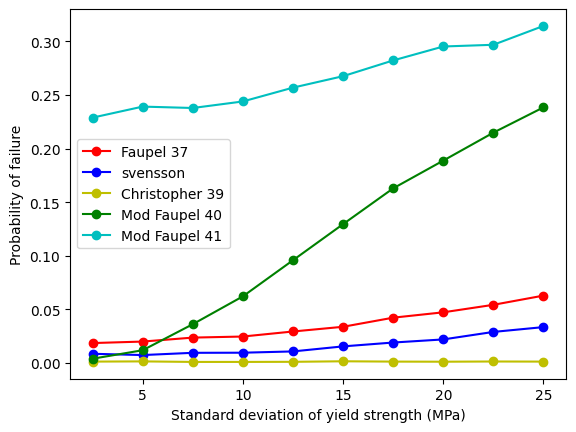

In [33]:
# Different sds: 0.5, 0.75, ..., 3.25
sds = [sd for sd in np.arange(2.5, 27.5, 2.5)]

# Final probabilities for each method (faupel, christopher, ...)
probs_faupel_37 = np.array([])
probs_svensson_38 = np.array([])
probs_christopher_39 = np.array([])
probs_mod_faupel_40 = np.array([])
probs_mod_faupel_41 = np.array([])

# 10000 random vars for each sd
n = 10000

for sd in sds:

    faupel_37_vars = np.array([])
    svensson_38_vars = np.array([])
    christopher_39_vars = np.array([])
    mod_faupel_40_vars = np.array([])
    mod_faupel_41_vars = np.array([])

    P_o_vars = np.array([])

    # Simulate 1000 probabilities of failure for each SD of yield strength
    for i in range(n):

        # Simulate a var and put in in the respective array
        faupel_37_vars = np.append(faupel_37_vars, faupel_37(sigma_y(sd = sd), sigma_u(),  D_o(), D_i()))
        svensson_38_vars = np.append(svensson_38_vars, svensson_38(sigma_u(), sigma_y(sd = sd), 0.15, D_o(), D_i()))
        mod_faupel_40_vars = np.append(mod_faupel_40_vars, mod_faupel_40(sigma_u(), sigma_y(sd = sd), D_o(), D_i()))
        christopher_39_vars = np.append(christopher_39_vars, christopher_39(sigma_u(), sigma_y(sd = sd), D_o(), D_i()))
        P_o_vars = np.append(P_o_vars, P_o())
        mod_faupel_41_vars = np.append(mod_faupel_41_vars, mod_faupel_41(sigma_u(), sigma_y(sd = sd), D_o(), D_i()))
    
    # Check if smaller than P_o
    smaller_than_P_o_faupel_37 = faupel_37_vars < P_o_vars
    smaller_than_P_o_svensson_38 = svensson_38_vars < P_o_vars
    smaller_than_P_o_christopher_39 = christopher_39_vars < P_o_vars
    smaller_than_P_o_mod_faupel_40 = mod_faupel_40_vars < P_o_vars
    smaller_than_P_o_mod_faupel_41 = mod_faupel_41_vars < P_o_vars

    # Adds probabilities to the final result
    probs_faupel_37 = np.append(probs_faupel_37, np.count_nonzero(smaller_than_P_o_faupel_37) / n)
    probs_svensson_38 = np.append(probs_svensson_38, np.count_nonzero(smaller_than_P_o_svensson_38) / n)
    probs_christopher_39 = np.append(probs_christopher_39, np.count_nonzero(smaller_than_P_o_christopher_39) / n)
    probs_mod_faupel_40 = np.append(probs_mod_faupel_40, np.count_nonzero(smaller_than_P_o_mod_faupel_40) / n)
    probs_mod_faupel_41 = np.append(probs_mod_faupel_41, np.count_nonzero(smaller_than_P_o_mod_faupel_41) / n)

_ = plt.plot(sds, probs_faupel_37, '-or', label = 'Faupel 37')
_ = plt.plot(sds, probs_svensson_38, '-ob', label = 'svensson' )
_ = plt.plot(sds, probs_christopher_39, '-oy', label = 'Christopher 39' )
_ = plt.plot(sds, probs_mod_faupel_40, '-og', label = 'Mod Faupel 40')
_ = plt.plot(sds, probs_mod_faupel_41, '-oc', label = 'Mod Faupel 41')
_ = plt.ylabel('Probability of failure')
_ = plt.xlabel('Standard deviation of yield strength (MPa)')
_ = plt.legend(loc = 'best')

